### QLSC612 Fundamentals of Neuro Data Science Practical Assessment [(The BrainHack School)](https://school.brainhackmtl.org)
Emily Chen  
May 31, 2020

#### Acknowledgements
This assignment used Dr. Jean-Baptiste Poline's [Introduction to Statistics in Python](https://github.com/neurodatascience/course-materials-2020/tree/master/lectures/14-may/02-intro-to-stats) lecture for reference. A complete video of the lecture can be found [here](https://www.youtube.com/watch?v=EYVV-9NjdSA&list=PLfqBzCl5BL3-m9BH5qi4u4QzoJBC8Ze72&index=13&t=0s). 

In [206]:
#Import modules
import pandas as pd
from pandas import plotting as pdplt
import random as rd
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas.tools'

**Step 1:** Load the `brainsize.csv`file and read it into a `pandas` data frame. 

Note: I will be using a GitHub repository link to the csv file rather than a path to a directory on my local machine to make this process more easily reproducible for others. 

In [172]:
brainsize_file = ('https://raw.githubusercontent.com/emilyemchen/Chen-E-QLSC612/master/practical/brainsize.csv')
brainsize = pd.read_csv(brainsize_file,sep=";",index_col=0,na_values=".") #Create pandas dataframe
#sep=";" means the data is separated by semicolons
#index_col=0 means the first column of the data is used as the row labels in the dataframe
#na_values="." means replacing values denoted as "." with "NaN."
brainsize.head() #Print beginning of file

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


**_Step 1.1:_** Calculate statistics for the current dataframe. 

In [173]:
brainsize.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


**_Step 1.2:_** Plot the data in a scatter_matrix to see the distribution of the different variables. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a275e07d0>,
      dtype=object)

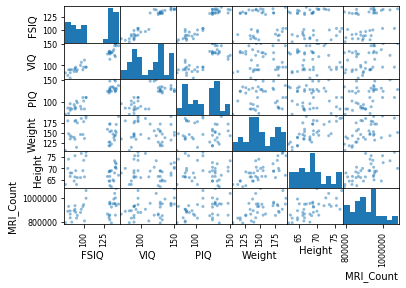

In [174]:
#Plot the variables using pandas.plotting 
pdplt.scatter_matrix(brainsize[["Gender","FSIQ","VIQ","PIQ","Weight","Height","MRI_Count"]])

**Step 2:** Create a new random variable `partY` of random noise and add it to the `brainsize.csv` data frame. 

Note: `partY` in this case will be a continuous random variable representing the average amount of time (in minutes) the subject spends outdoors each day (assume this data was collected before COVID-19). We can assume that the subject was asked to indicate the average time rounded to the nearest integer value, so the random values generated for `partY` will range from 0 to 1440 (24 hours in a day * 60 minutes in an hour). 

In [175]:
#Create an empty array to hold the values for partY
partY_values = []

#Calculate the number of subjects
num_rows = len(brainsize.index)

#Set a seed value to get the same random values each time
rd.seed(0)

#Populate the array with random integer values from 0 to 1440 
for i in range(num_rows): 
    i = rd.randint(0,1440)
    partY_values.append(i)

#Add the populated array as a column to the data frame and name it "partY"
brainsize["partY"] = partY_values

#Check out the head of the new data frame with "partY" added
brainsize.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
1,Female,133,132,124,118.0,64.5,816932,788
2,Male,140,150,124,NaN,72.5,1001121,861
3,Male,139,123,150,143.0,73.3,1038437,82
4,Male,133,129,128,172.0,68.8,965353,530
5,Female,137,132,134,147.0,65.0,951545,1047


**_Step 2.1:_** Plot the distribution of the new `partY` variable using `pandas.plotting`.

Note: `partY` data is not normally distributed. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27f93490>]],
      dtype=object)

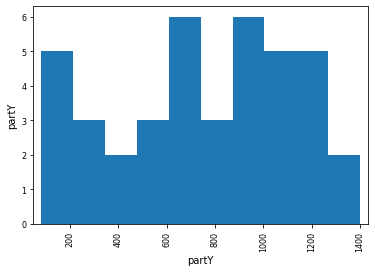

In [176]:
pdplt.scatter_matrix(brainsize[["partY"]])

**_Step 2.2:_** Generate correlations between the `partY` variable using the existing variables in `brainsize.csv`.

Note: To generate correlations with `Weight` and `Height`, we will drop the subjects that have `NaN` values for these variables. This is a form of p-hacking.

Another form of p-hacking in this case will be to try multiple correlations but report only ones that have a significant p-value (p < 0.05).

In [187]:
#Try out various correlations with partY and ignoring NaN values 
#Uncomment the correlation you would like to run as only one can be run at a time

#FSIQ and partY
#scipy.stats.ttest_rel(brainsize["FSIQ"],brainsize["partY"],nan_policy="omit")

#VIQ and partY
#scipy.stats.ttest_rel(brainsize["VIQ"],brainsize["partY"],nan_policy="omit")

#PIQ and partY
#scipy.stats.ttest_rel(brainsize["PIQ"],brainsize["partY"],nan_policy="omit")

#Weight and partY
#scipy.stats.ttest_rel(brainsize["Weight"],brainsize["partY"],nan_policy="omit")

#Height and partY
#scipy.stats.ttest_rel(brainsize["Height"],brainsize["partY"],nan_policy="omit")

#MRI_Count and partY
#scipy.stats.ttest_rel(brainsize["MRI_Count"],brainsize["partY"],nan_policy="omit")

Ttest_relResult(statistic=79.44262473134104, pvalue=9.470969151961395e-45)

**_Step 2.3:_** Plot the outcome of the most significant correlation (in this case, `MRI_Count` and `partY`), taking gender into account. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a290336d0>,
      dtype=object)

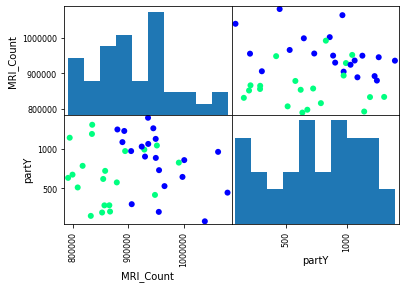

In [213]:
pdplt.scatter_matrix(brainsize[["MRI_Count","partY"]],
                        c=(brainsize["Gender"] == 'Female'), marker="o",
                        alpha=1, cmap="winter")

**Step 3:** Create another random variable `partY2` of random noise and add it to the `brainsize.csv` data frame. `partY2` will have the same distribution as `partY` because it will be generated using the same random integer function `random.randit`; however, it will use a different seed value. 

Note: `partY2` in this case will be a continuous random variable representing the average number of calories consumed by the subject each day (assume this data was collected before COVID-19). We can assume that the subject was asked to indicate the average number of calories rounded to the nearest integer value, so the random values generated for partY will range from 500 (all subjects assumed to not be fasting) to 2000 (recommended daily number of calories).

In [178]:
#Create an empty array to hold the values for partY
partY2_values = []

#Calculate the number of subjects
num_rows = len(brainsize.index)

#Set a seed value to get the same random values each time
rd.seed(100)

#Populate the array with random integer values from 500 to 2000 
for i in range(num_rows): 
    i = rd.randint(500,2000)
    partY2_values.append(i)

#Add the populated array as a column to the data frame and name it "partY"
brainsize["partY2"] = partY2_values

#Check out the head of the new data frame with "partY" added
brainsize.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY,partY2
1,Female,133,132,124,118.0,64.5,816932,788,798
2,Male,140,150,124,NaN,72.5,1001121,861,1441
3,Male,139,123,150,143.0,73.3,1038437,82,1431
4,Male,133,129,128,172.0,68.8,965353,530,857
5,Female,137,132,134,147.0,65.0,951545,1047,1944


**_Step 3.1:_** Plot the distribution of the new `partY2` variable using pandas.plotting.

Note: `partY2` data is not normally distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28302a10>]],
      dtype=object)

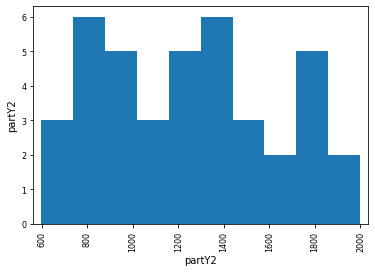

In [179]:
pdplt.scatter_matrix(brainsize[["partY2"]])

**_Step 3.2:_** Generate correlations between the `partY2` variable using the existing variables in `brainsize.csv`.

Note: To generate correlations with `Weight` and `Height`, we will continue to exclude the subjects that have `NaN` values for these variables as a form of p-hacking.

Another form of p-hacking in this case will be to once again try multiple correlations but report only ones that have a significant p-value (p < 0.05).

In [194]:
#Try out various correlations with partY2 and ignoring NaN values 
#Uncomment the correlation you would like to run as only one can be run at a time

#FSIQ and partY2
#scipy.stats.ttest_rel(brainsize["FSIQ"],brainsize["partY2"],nan_policy="omit")

#VIQ and partY2
#scipy.stats.ttest_rel(brainsize["VIQ"],brainsize["partY2"],nan_policy="omit")

#PIQ and partY2
#scipy.stats.ttest_rel(brainsize["PIQ"],brainsize["partY2"],nan_policy="omit")

#Weight and partY2
#scipy.stats.ttest_rel(brainsize["Weight"],brainsize["partY2"],nan_policy="omit")

#Height and partY2
#scipy.stats.ttest_rel(brainsize["Height"],brainsize["partY2"],nan_policy="omit")

#MRI_Count and partY2
#scipy.stats.ttest_rel(brainsize["MRI_Count"],brainsize["partY2"],nan_policy="omit")

**_Step 3.3:_** Plot the outcome of the most significant correlation (in this case, `MRI_Count` and `partY2`), taking gender into account. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29281fd0>,
      dtype=object)

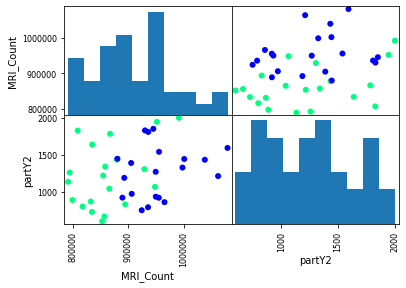

In [214]:
pdplt.scatter_matrix(brainsize[["MRI_Count","partY2"]],
                        c=(brainsize["Gender"] == 'Female'), marker="o",
                        alpha=1, cmap="winter")